In [1]:
import numpy as np
import pandas as pd
from glob import glob
import os
import matplotlib.pyplot as plt

In [2]:
import mne

In [3]:
plt.style.use('seaborn-bright') # Plot Style
plt.rcParams['figure.dpi'] = 200 # DPI setting
plt.rcParams['figure.figsize'] = (4, 2)

In [7]:
raw_h11 = mne.io.read_raw_edf("h11.edf", preload=True)

Extracting EDF parameters from C:\Users\Anuj\Untitled Folder\EEG classification\h11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 228749  =      0.000 ...   914.996 secs...


In [8]:
raw_s11 = mne.io.read_raw_edf("s11.edf", preload=True)

Extracting EDF parameters from C:\Users\Anuj\Untitled Folder\EEG classification\s11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 339999  =      0.000 ...  1359.996 secs...


In [9]:
print('sample rate:', raw_h11.info['sfreq'], 'Hz')
# Give the size of the data matrix

sample rate: 250.0 Hz


In [10]:
print('Data matrix size : %s channels x %s samples' % (raw_h11.info['nchan'], len(raw_h11.times)))

Data matrix size : 19 channels x 228750 samples


In [11]:
print('Channel names:', raw_h11.info['ch_names'])

Channel names: ['Fp2', 'F8', 'T4', 'T6', 'O2', 'Fp1', 'F7', 'T3', 'T5', 'O1', 'F4', 'C4', 'P4', 'F3', 'C3', 'P3', 'Fz', 'Cz', 'Pz']


Using matplotlib as 2D backend.


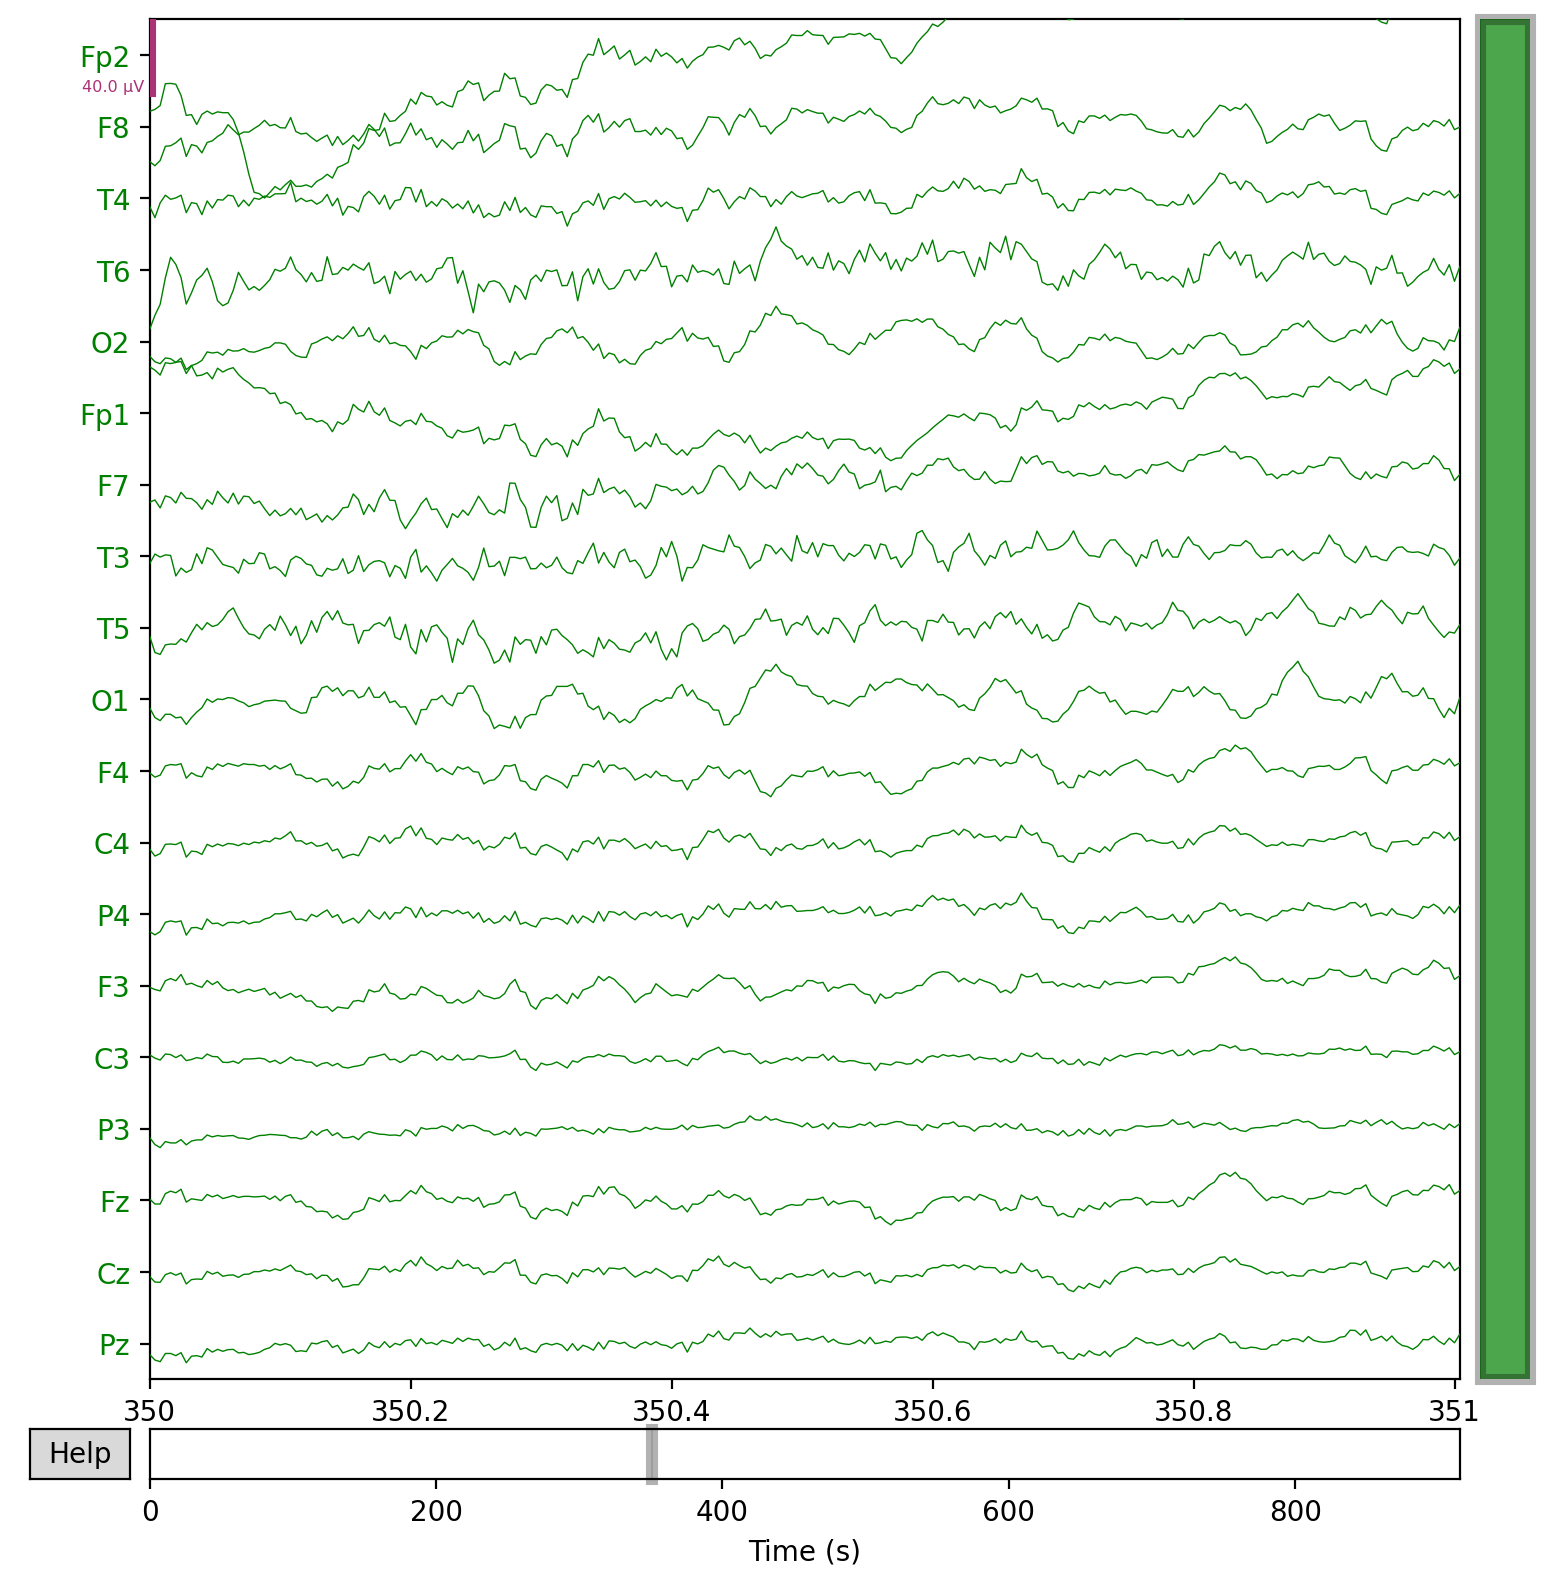

In [12]:
raw_h11.plot(start=350,duration=1, block=True, show=False, color='green')

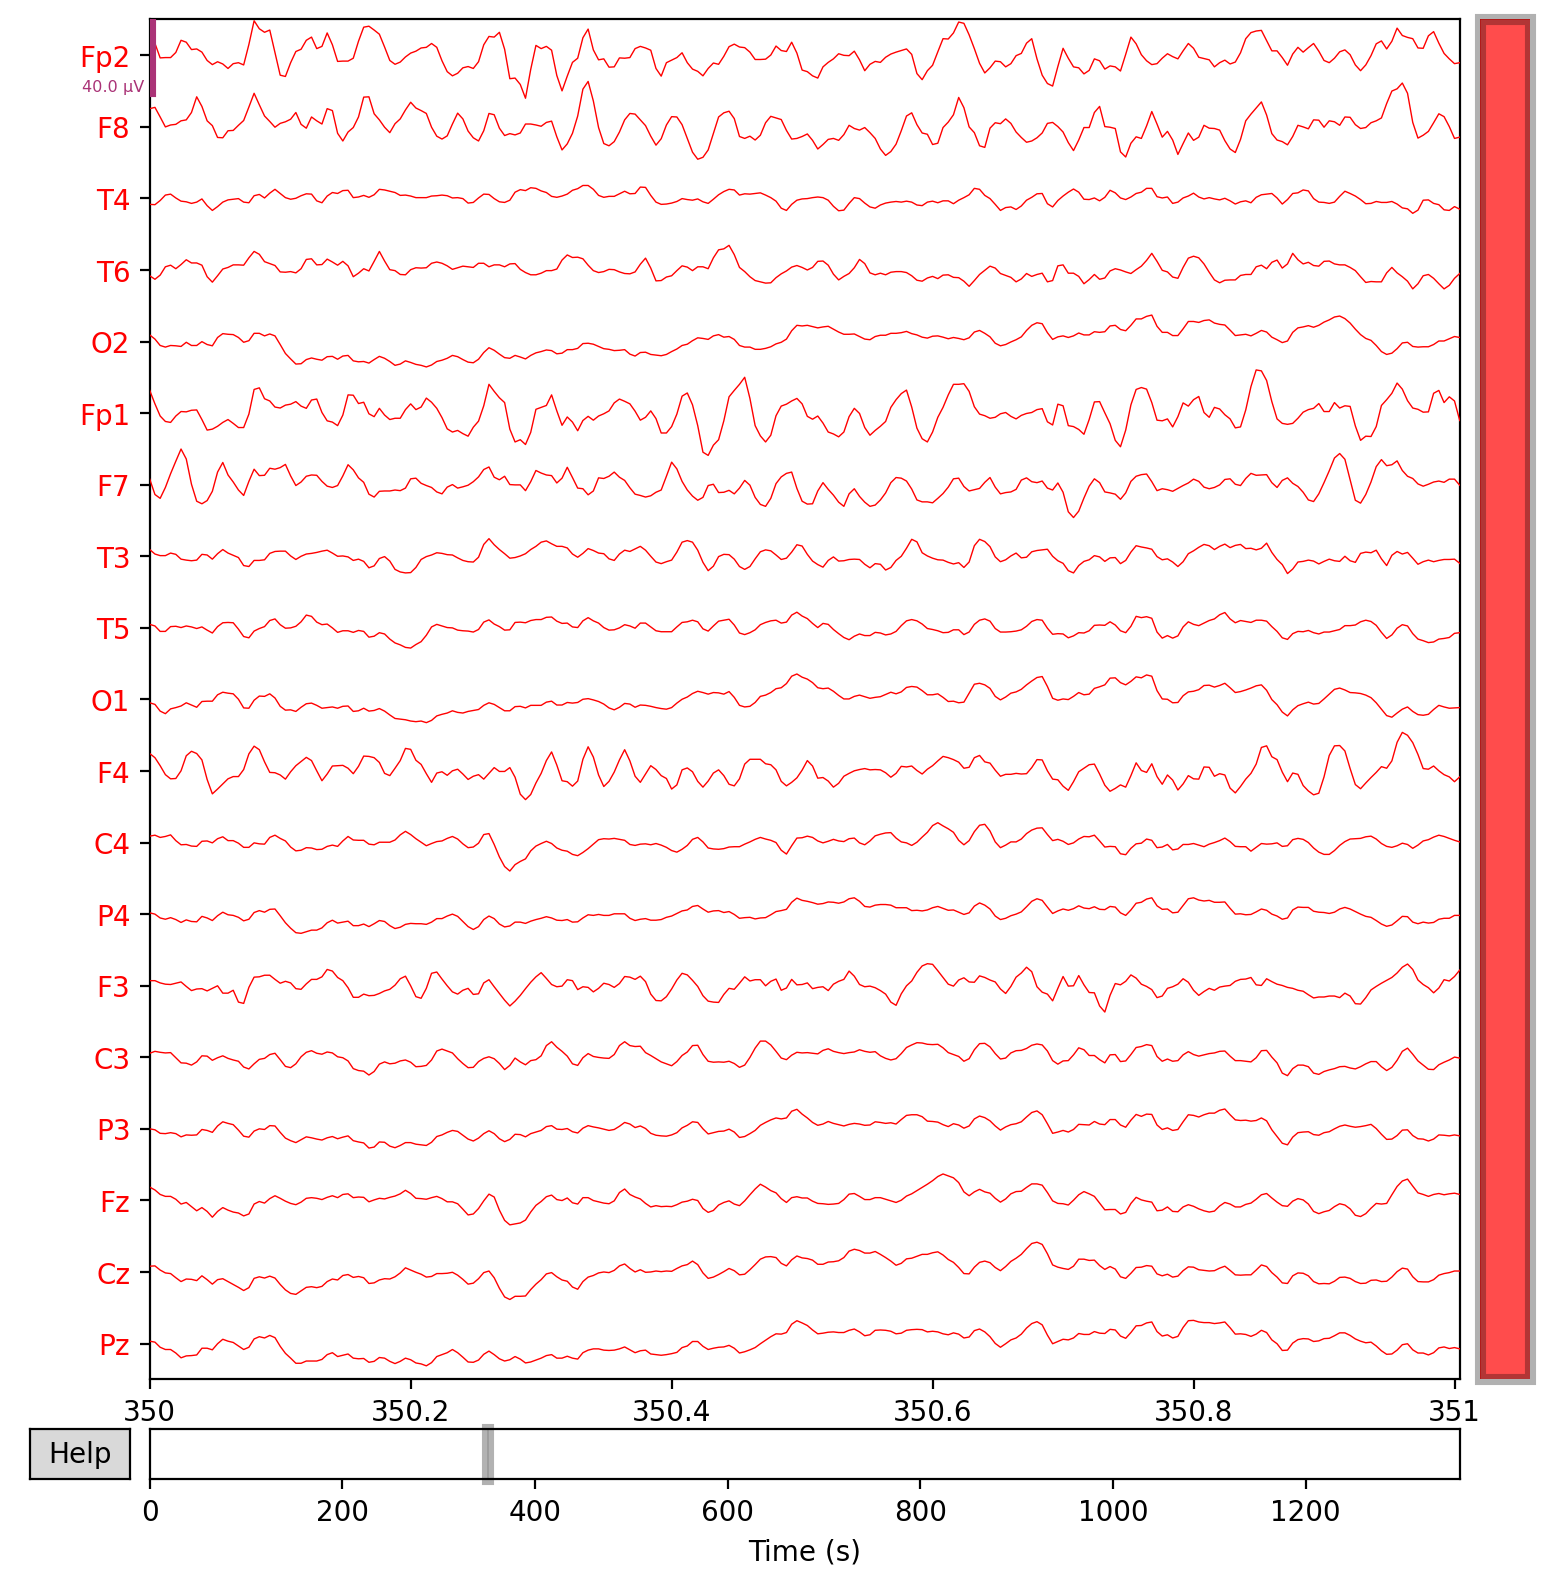

In [13]:
raw_s11.plot(start=350,duration=1, block=True, show=False, color='red')

In [14]:
xfil_h11=raw_h11.filter(0.5, 100., fir_design='firwin')#Bandpass filtering

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


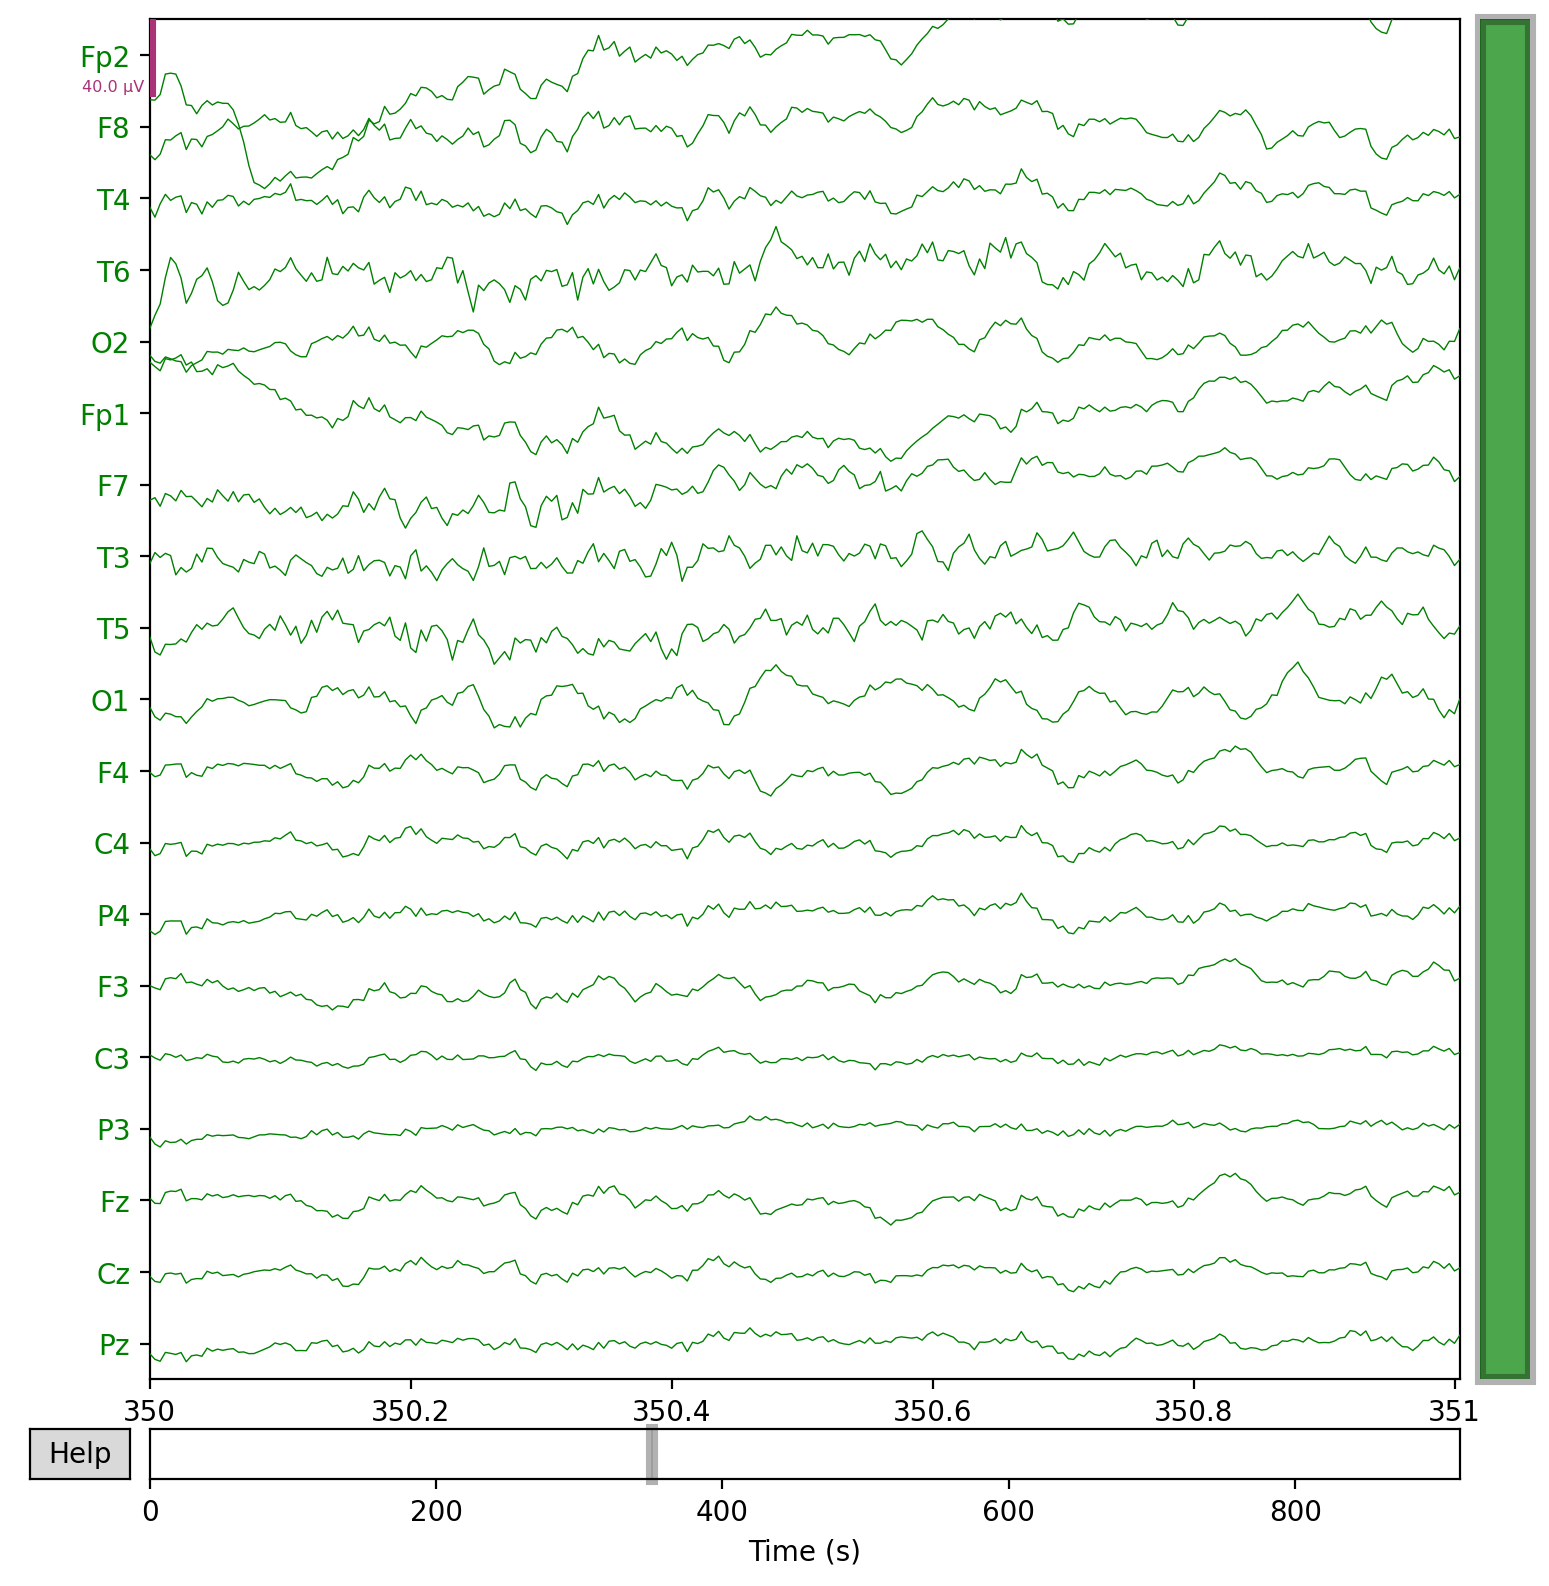

In [15]:
xfil_h11.plot(start=350, duration=1, bgcolor='w',show=False, events=None,proj=False,color='green')#plotting of the filtered signal

In [16]:
xfil_s11=raw_s11.filter(0.5, 100., fir_design='firwin')#Bandpass filtering

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.1s finished


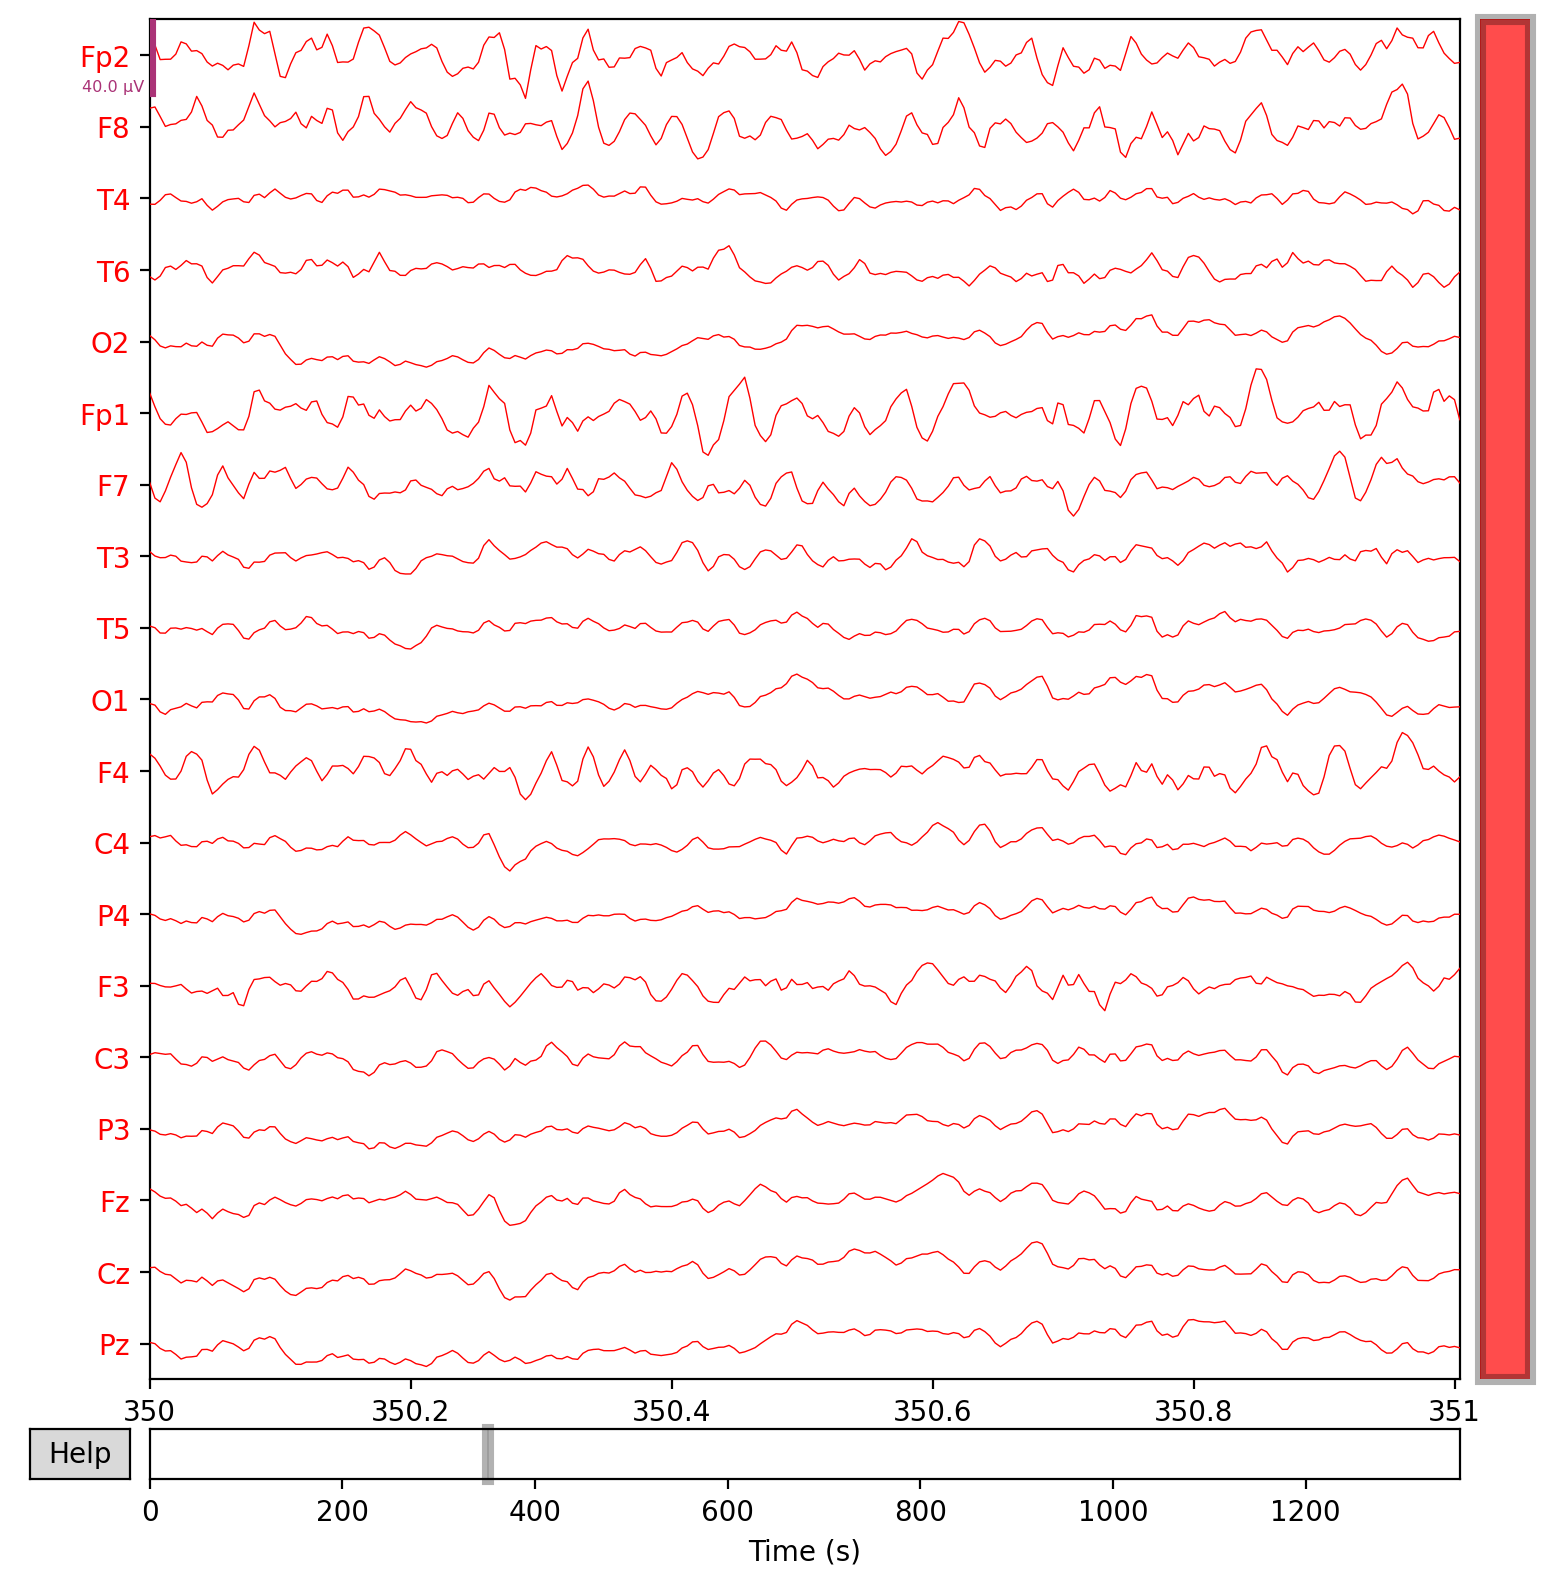

In [17]:
xfil_s11.plot(start=350, duration=1, bgcolor='w',show=False, events=None,proj=False,color='red')#plotting of the filtered signal

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


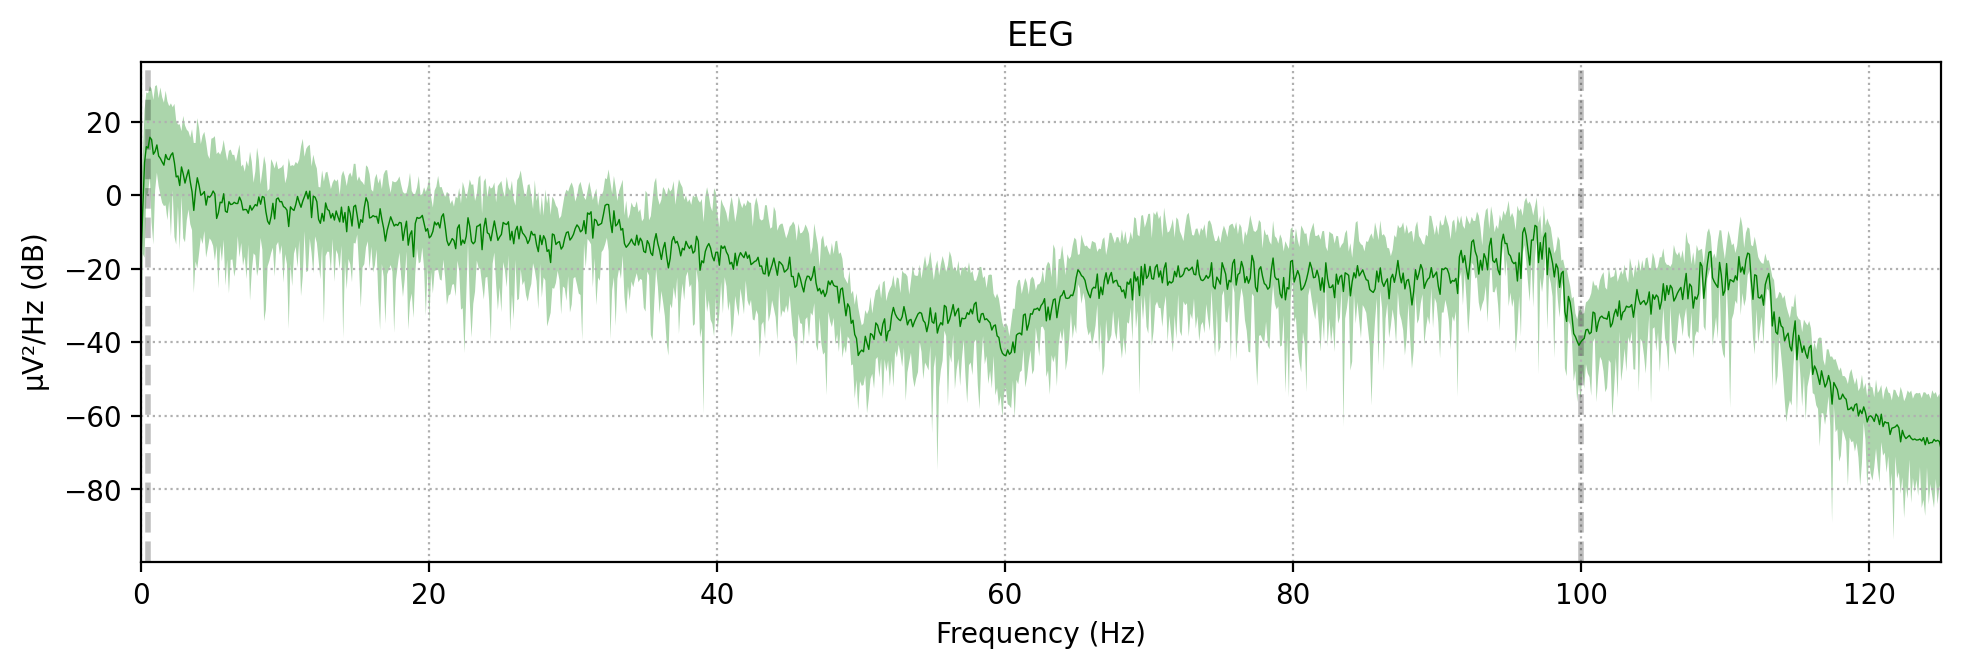

In [18]:
xfil_h11.plot_psd(area_mode='range', tmax=10.0, show=False, average=True, color='green')

In [19]:
epoch_duration = 25
epoch_samples = int(epoch_duration * raw_h11.info['sfreq'])

In [20]:
start_times = np.arange(0, raw_h11.n_times, epoch_samples)

In [21]:
from sklearn import preprocessing

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


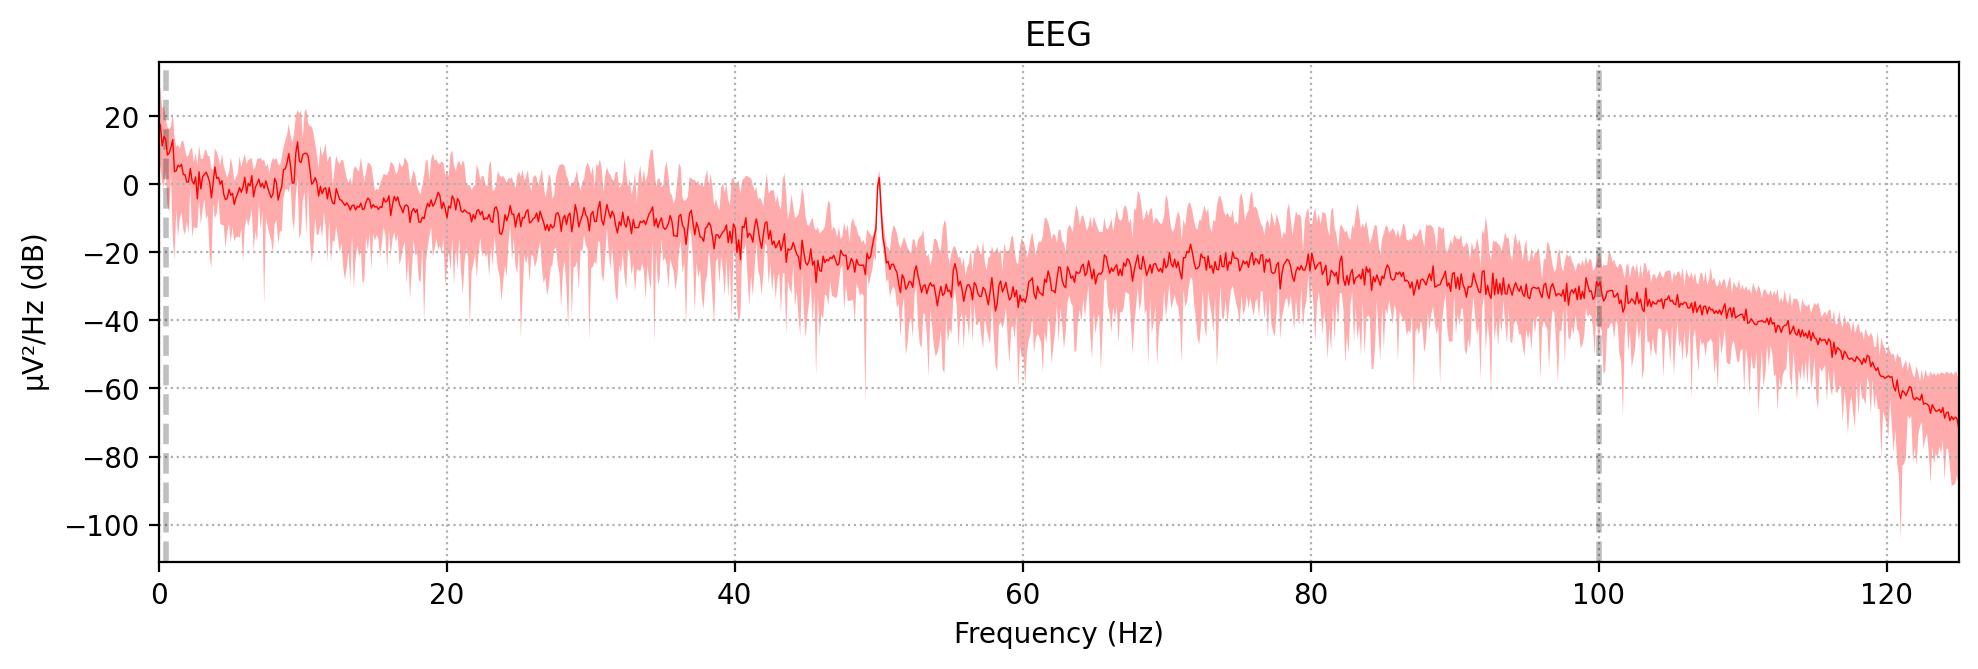

In [22]:
xfil_s11.plot_psd(area_mode='range', tmax=10.0, show=False, average=True, color='red')

In [27]:
raw_h2 = mne.io.read_raw_edf("h02.edf", preload=True)

Extracting EDF parameters from C:\Users\Anuj\Untitled Folder\EEG classification\h02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...


In [28]:
raw_s2 = mne.io.read_raw_edf("s02.edf", preload=True)

Extracting EDF parameters from C:\Users\Anuj\Untitled Folder\EEG classification\s02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 286249  =      0.000 ...  1144.996 secs...


C:\Users\Anuj\anaconda3\lib\site-packages\mne\viz\_mpl_figure.py:2145: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(FigureClass=FigureClass, **kwargs)


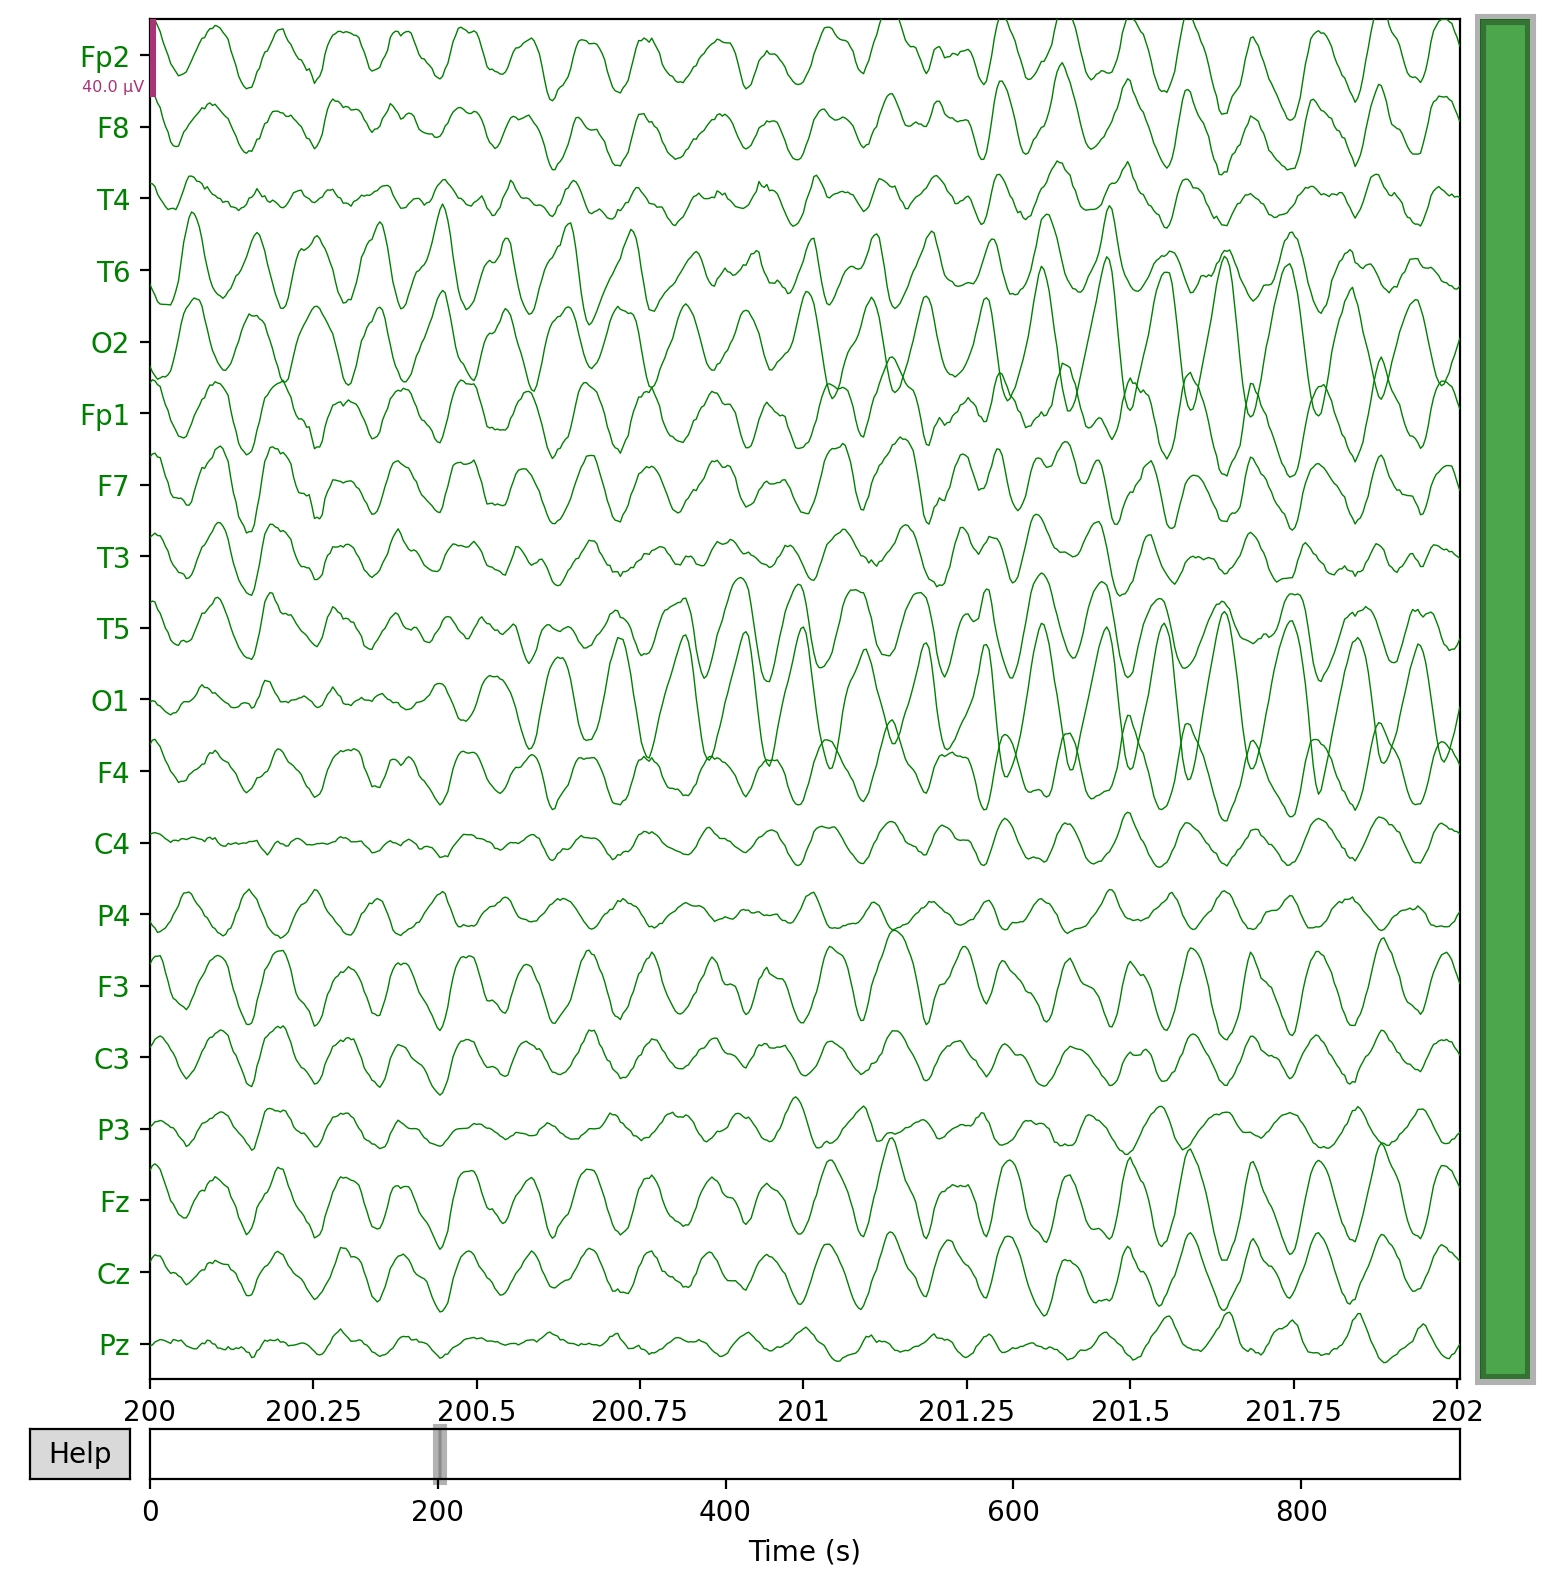

In [48]:
raw_h2.plot(start=200,duration=2, block=True, show=False, color='green')

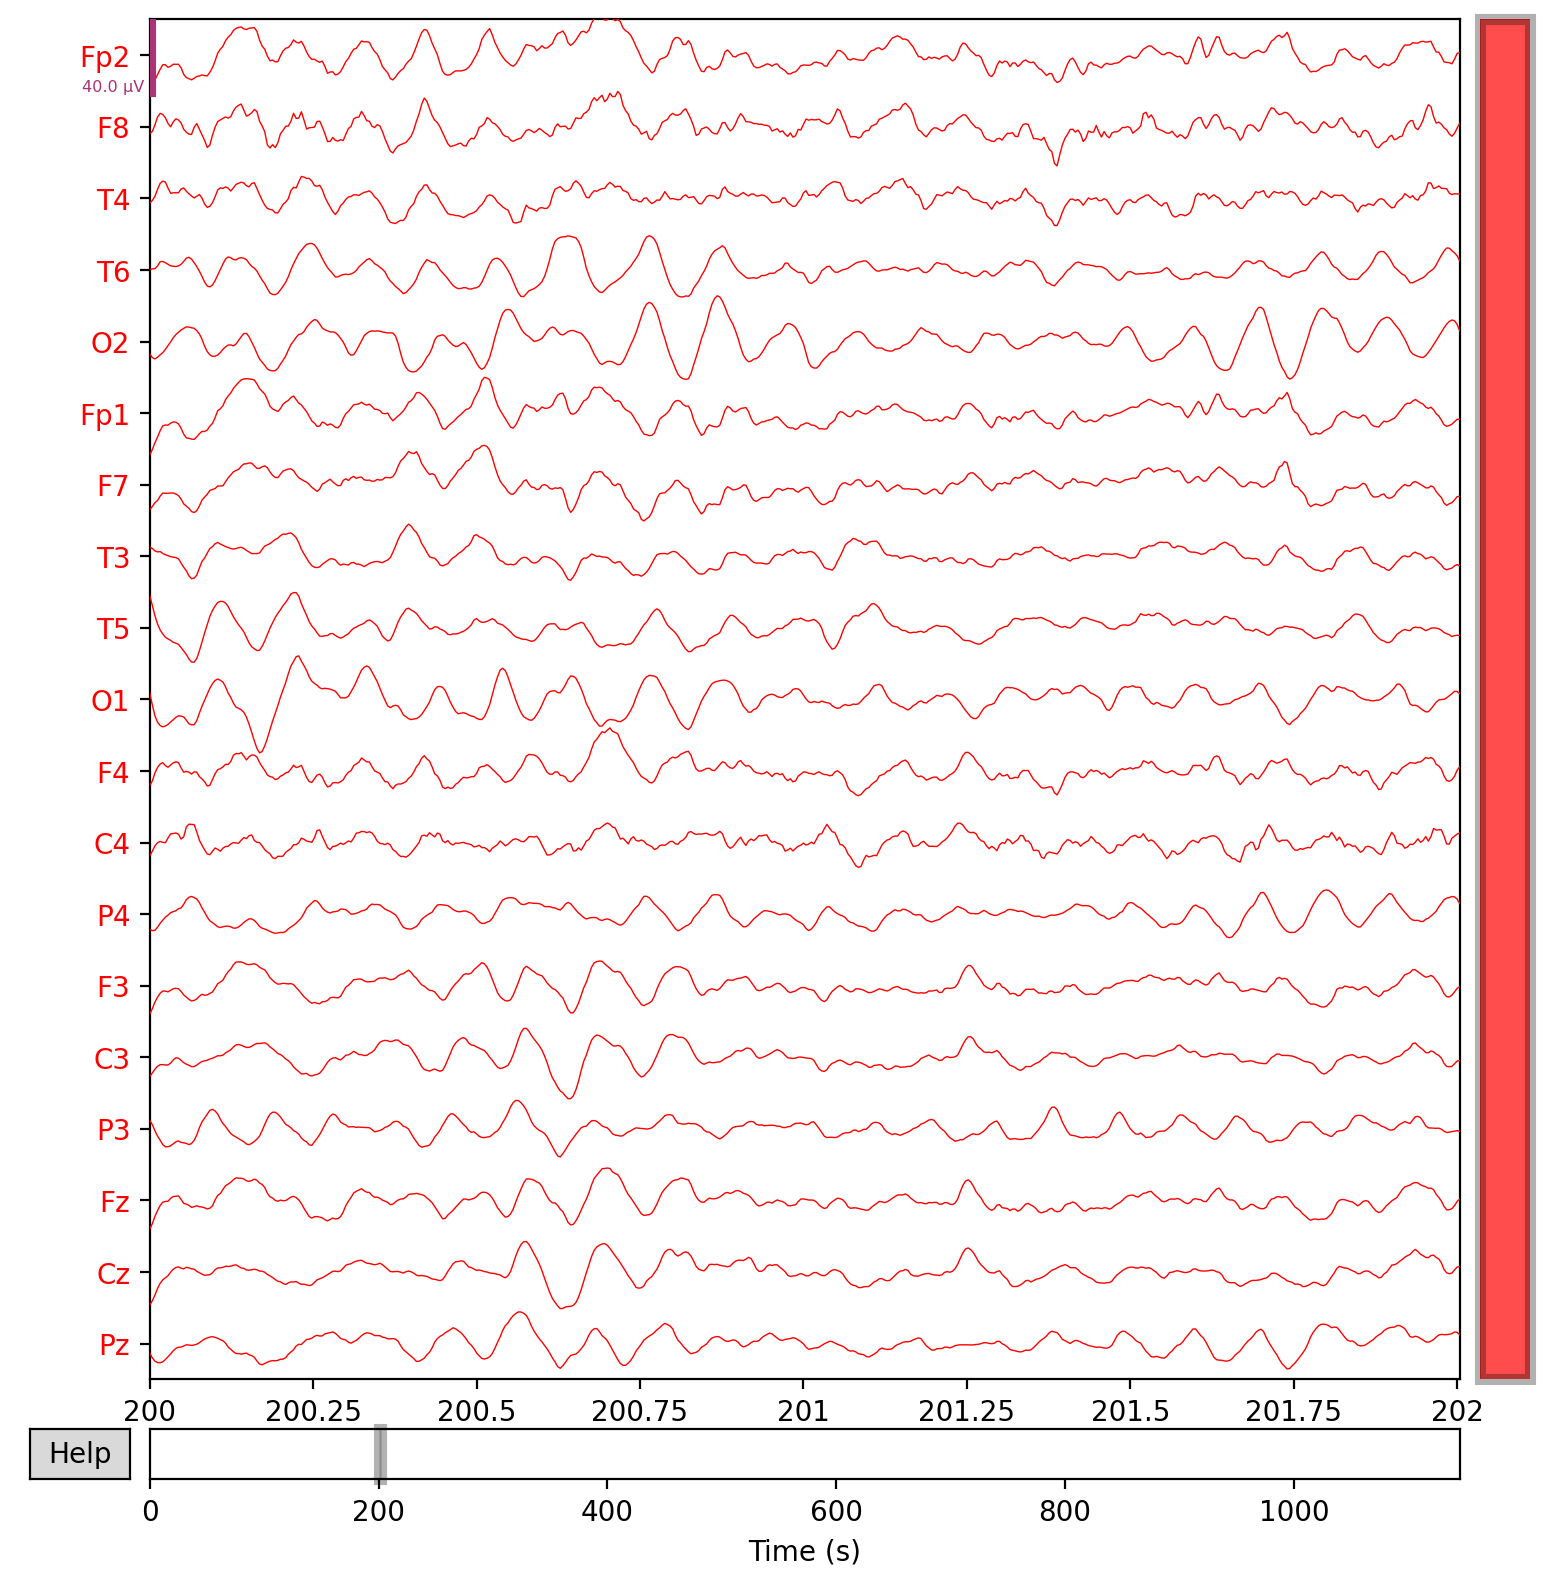

In [49]:
raw_s2.plot(start=200,duration=2, block=True, show=False, color='red')

In [50]:
xfil_h2=raw_h2.filter(1, 100., fir_design='firwin')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.1s finished


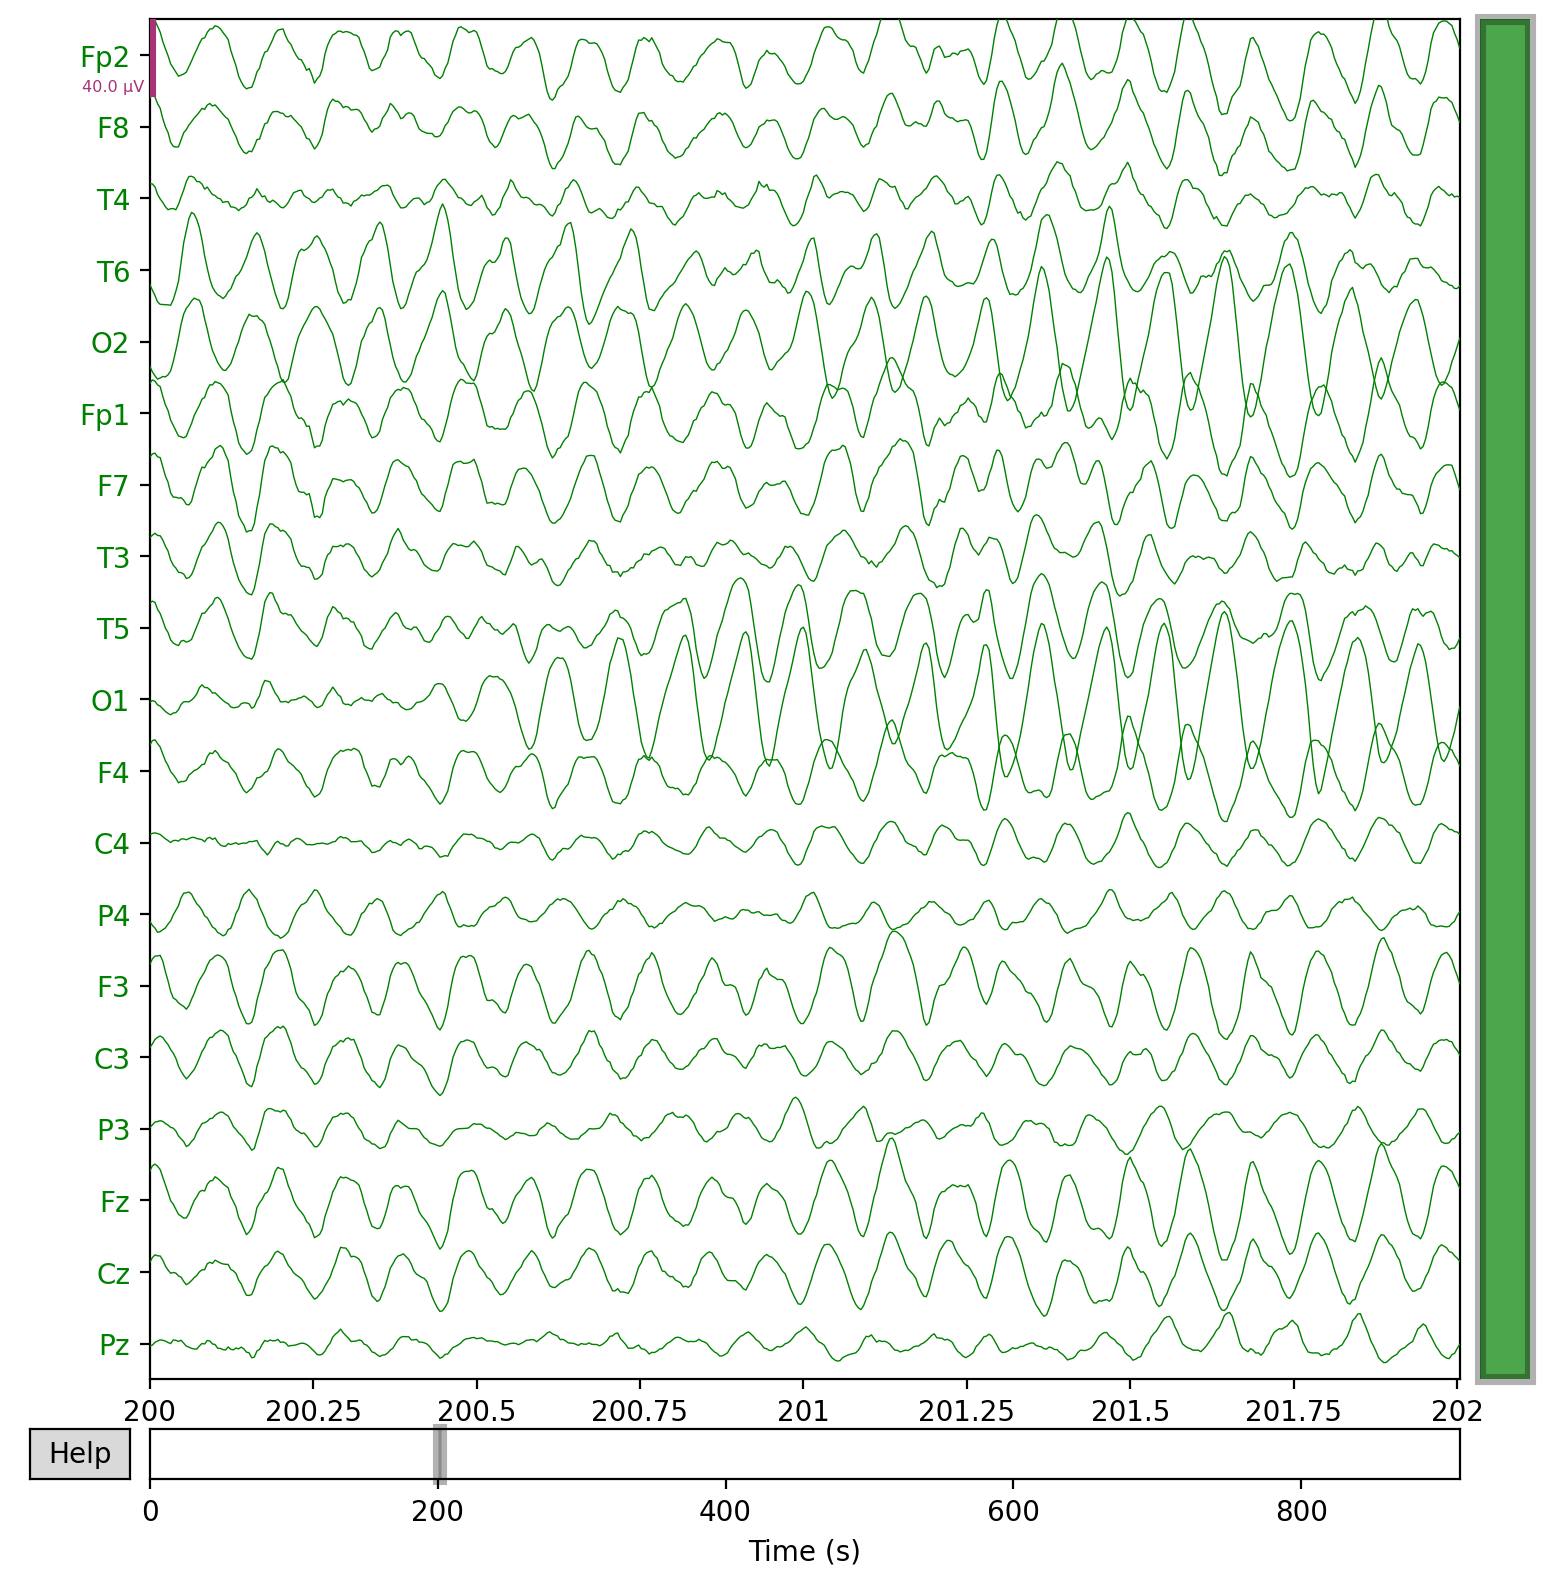

In [51]:
xfil_h2.plot(start=200, duration=2, bgcolor='w',show=False, events=None,proj=False,color='green')

In [52]:
xfil_s2=raw_s2.filter(1, 100., fir_design='firwin')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.1s finished


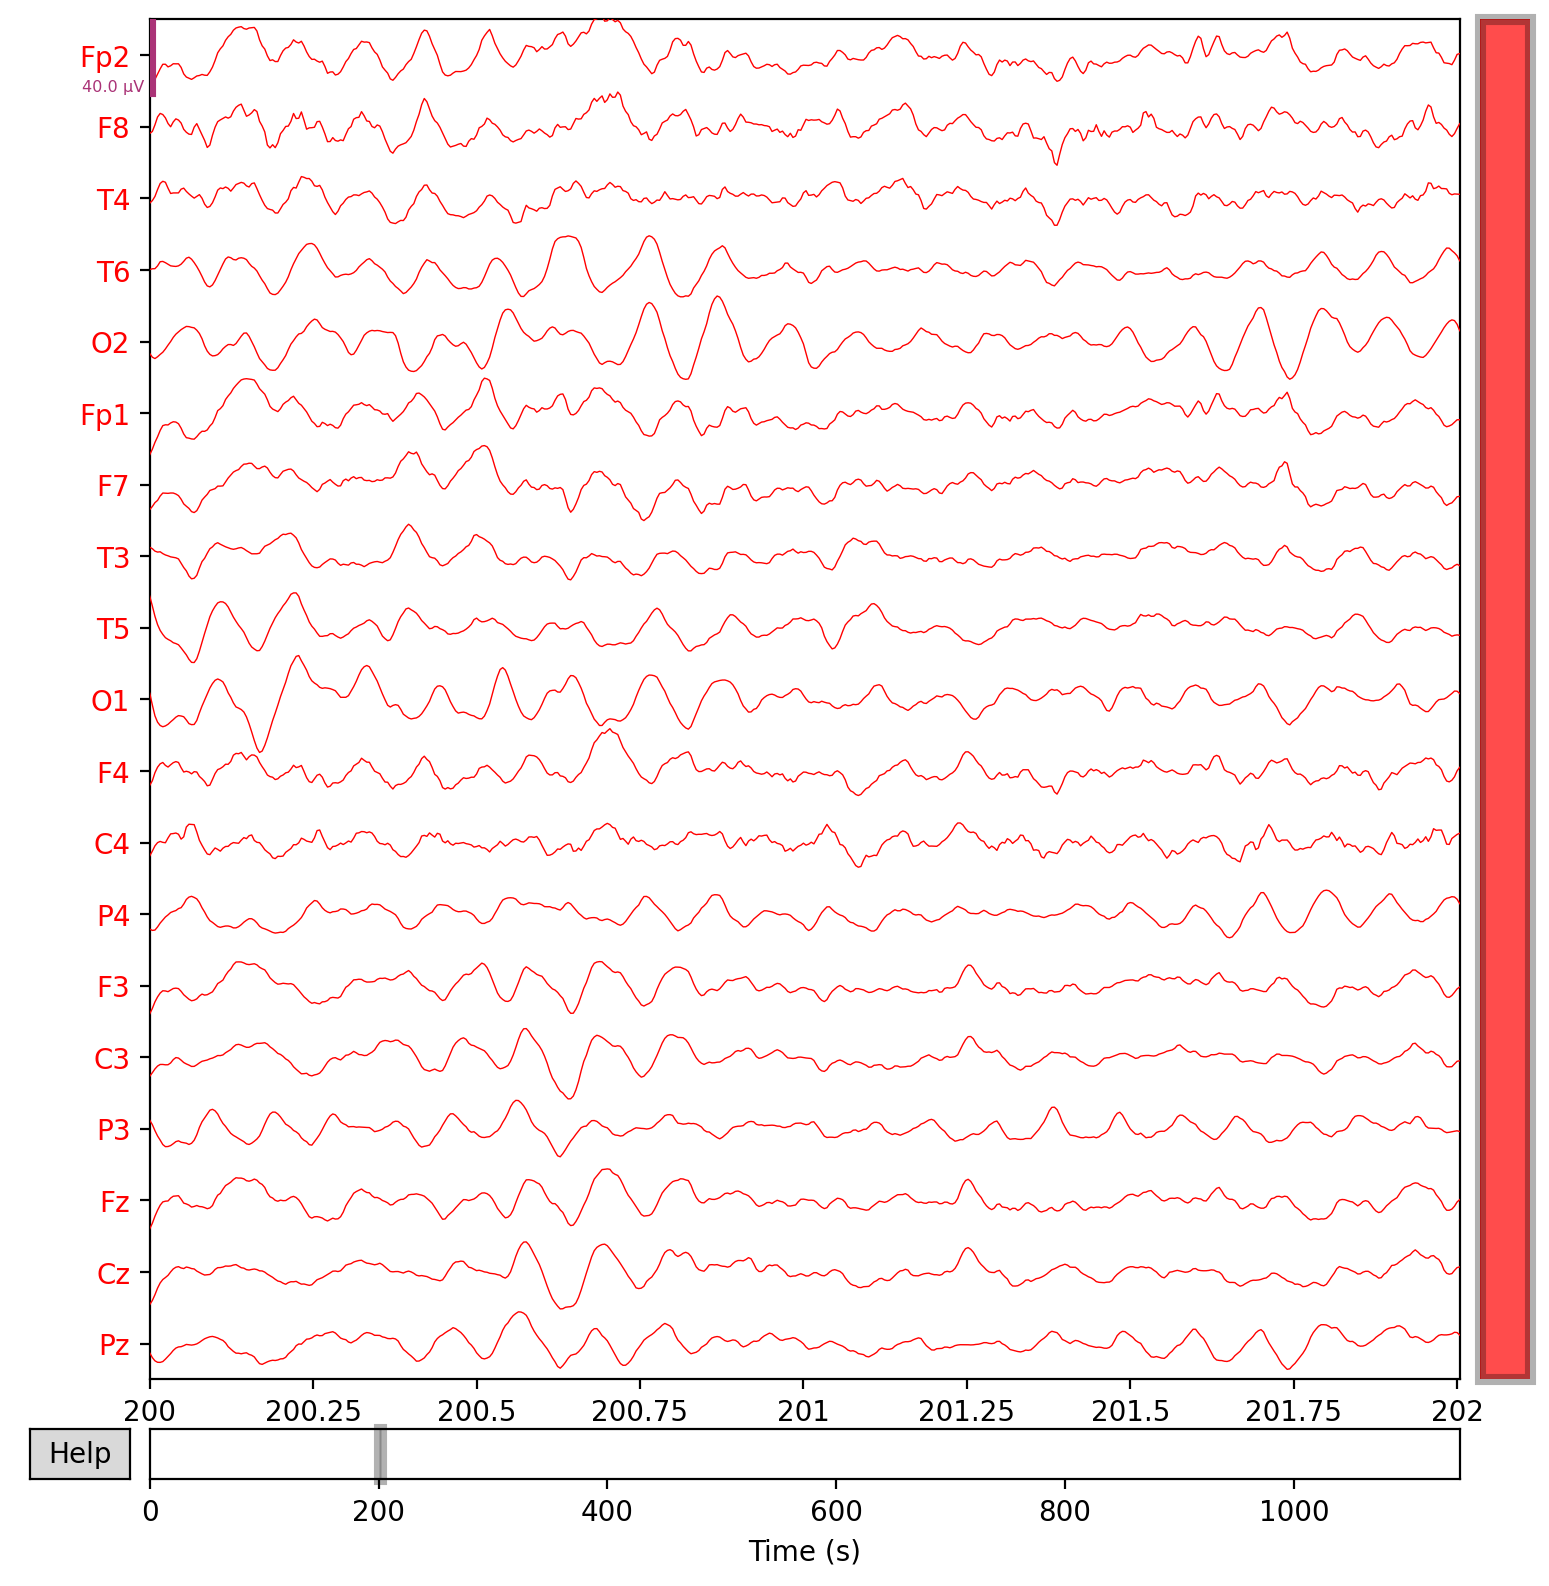

In [53]:
xfil_s2.plot(start=200, duration=2, bgcolor='w',show=False, events=None,proj=False,color='red')

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


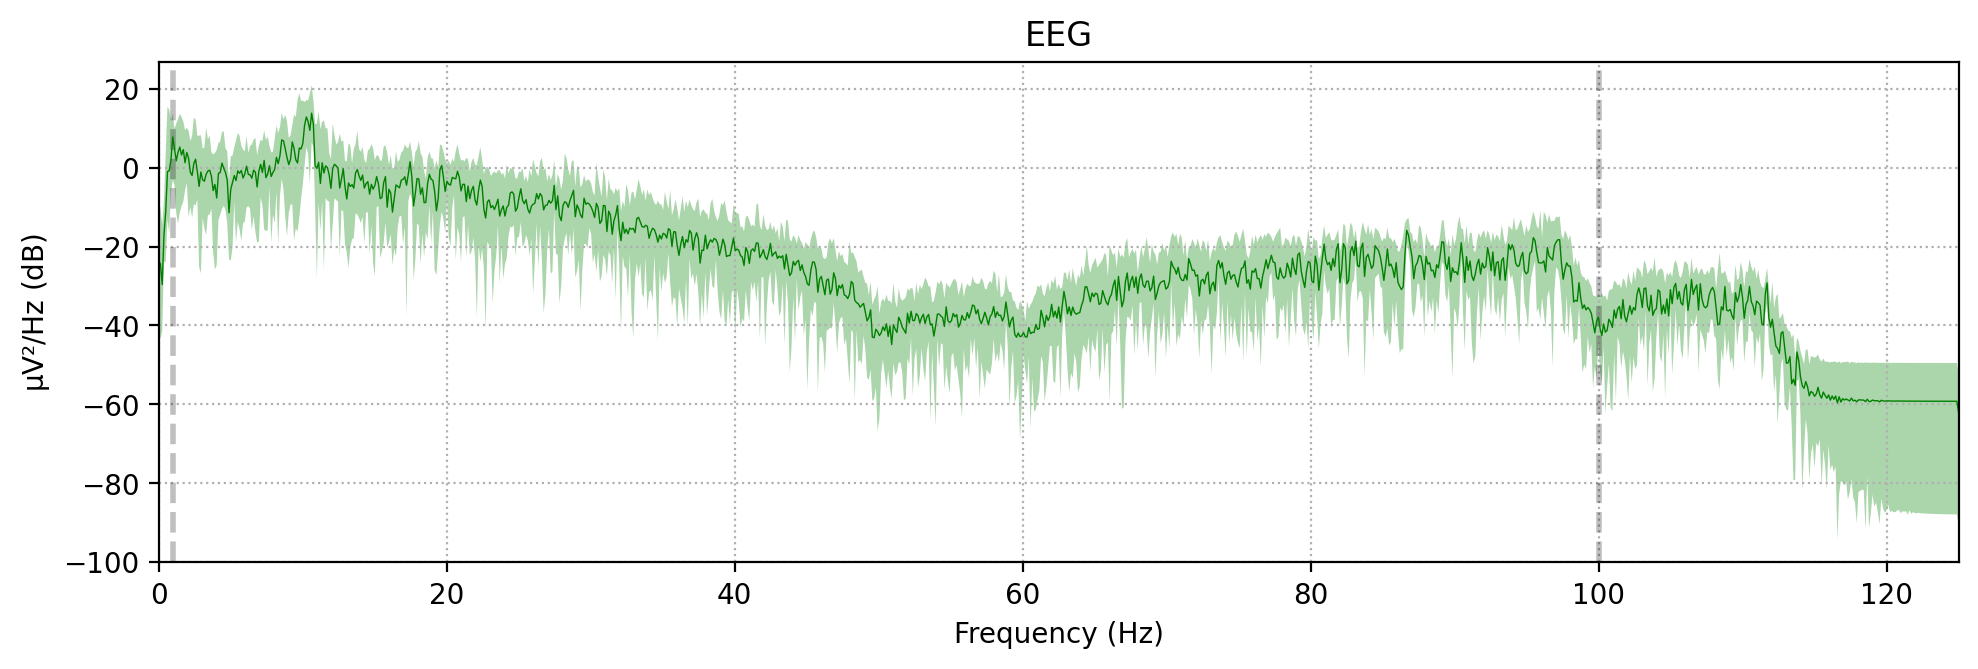

In [54]:
xfil_h2.plot_psd(area_mode='range', tmax=10.0, show=False, average=True, color='green')

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


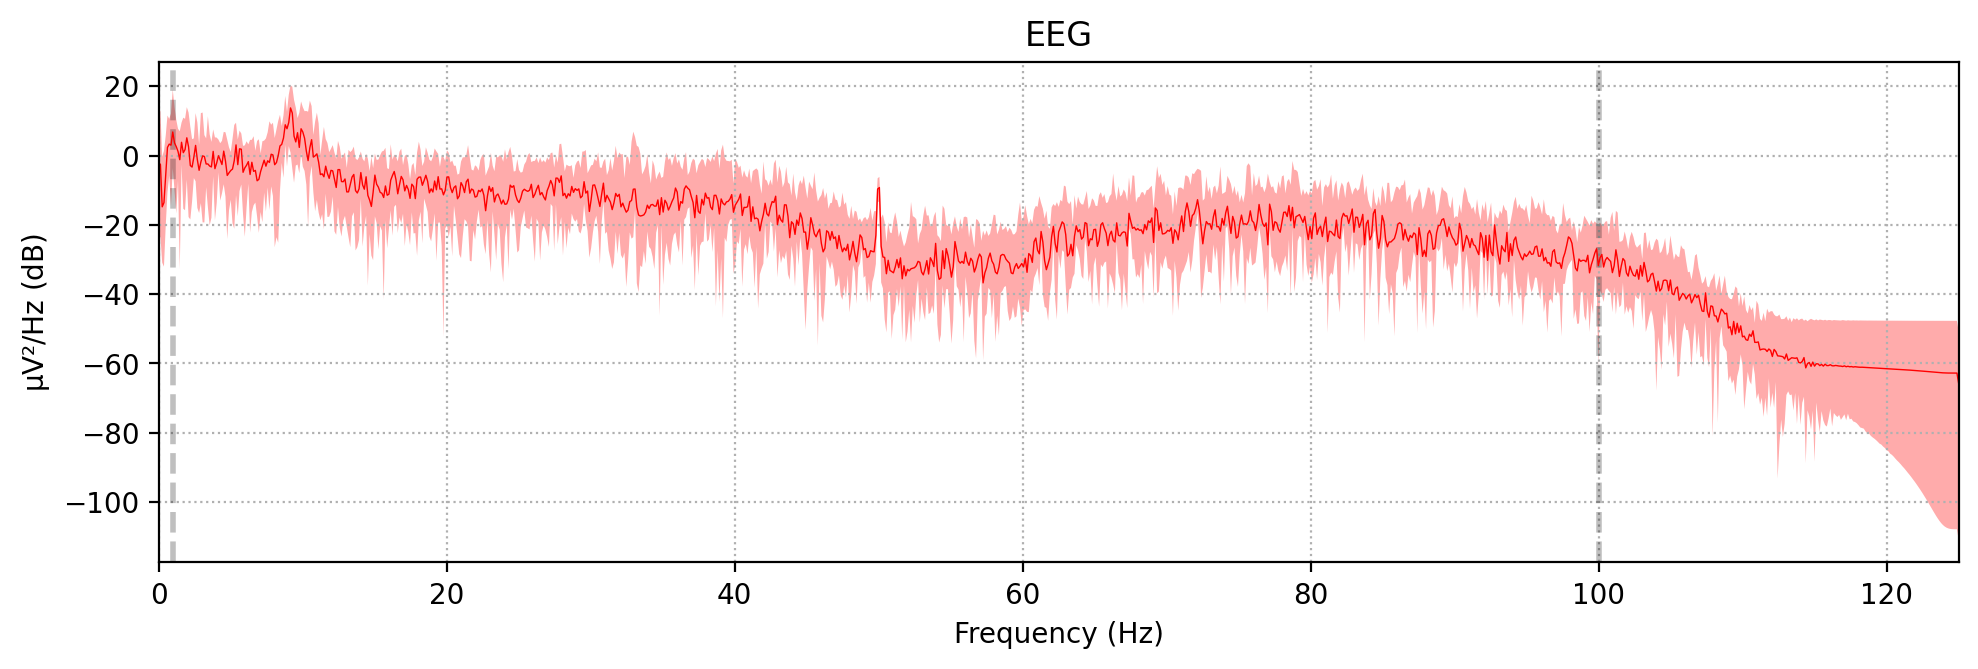

In [55]:
xfil_s2.plot_psd(area_mode='range', tmax=10.0, show=False, average=True, color='red')